<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/keras/s2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 保存图片

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


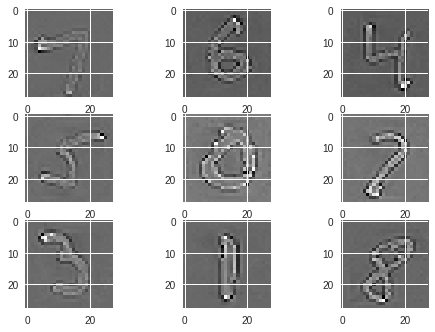

In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras import backend
import os

backend.set_image_data_format('channels_first')

# 导入数据
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# ZCA白化
imgGen = ImageDataGenerator(zca_whitening=True)
imgGen.fit(X_train)

# 创建目录，并保存图像
try:
    os.mkdir('image')
except:
    print('The fold is exist!')
for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9, save_to_dir='image', save_prefix='oct',
                                    save_format='png'):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [0]:
!ls image

oct_10051_9532.png  oct_14601_9585.png	oct_44582_1429.png
oct_106_4585.png    oct_18289_3612.png	oct_5608_9475.png
oct_14236_8668.png  oct_23878_8029.png	oct_9165_7983.png


# *cifar10*

170500096/170498071 [==============================] - 4s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # This is added back by InteractiveShellApp.init_path()


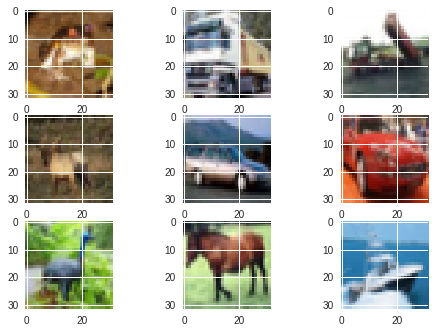

In [0]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from scipy.misc import toimage
import numpy as np

# 导入数据
(X_train, y_train), (X_validation, y_validation) = cifar10.load_data()

for i in range(0, 9):
    plt.subplot(331 + i)
    plt.imshow(toimage(X_train[i]))

# 显示图片
plt.show()

# 设定随机种子
seed = 7
np.random.seed(seed)

In [0]:
X_train[0]

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [0]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.initializers import RandomNormal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard

batch_size = 128
epochs = 200
iterations = 391
num_classes = 10
dropout = 0.5
log_filepath = './nin'


def normalize_preprocessing(x_train, x_validation):
    x_train = x_train.astype('float32')
    x_validation = x_validation.astype('float32')
    mean = [125.307, 122.95, 113.865]
    std = [62.9932, 62.0887, 66.7048]
    for i in range(3):
        x_train[:, :, :, i] = (x_train[:, :, :, i] - mean[i]) / std[i]
        x_validation[:, :, :, i] = (x_validation[:, :, :, i] - mean[i]) / std[i]

    return x_train, x_validation


def scheduler(epoch):
    if epoch <= 60:
        return 0.05
    if epoch <= 120:
        return 0.01
    if epoch <= 160:
        return 0.002
    return 0.0004


def build_model():
    model = Sequential()

    model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.01), input_shape=x_train.shape[1:],
                     activation='relu'))
    model.add(Conv2D(160, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(Conv2D(96, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    model.add(Dropout(dropout))

    model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    model.add(Dropout(dropout))

    model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))
    model.add(Conv2D(10, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(0.0001),
                     kernel_initializer=RandomNormal(stddev=0.05), activation='relu'))

    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

np.random.seed(seed=7)
# load data
(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)

x_train, x_validation = normalize_preprocessing(x_train, x_validation)

# build network
model = build_model()
print(model.summary())

# set callback
tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr, tb_cb]

'''
# set data augmentation
print('Using real-time data augmentation.')
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.125, height_shift_range=0.125,
                             fill_mode='constant', cval=0.)
datagen.fit(x_train)
# start training
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=iterations,
                    epochs=epochs, callbacks=cbks, validation_data=(x_validation, y_validation), verbose=2)
'''

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 192)       14592     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 160)       30880     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 96)        15456     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       460992    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 192)       37056     
__________

"\n# set data augmentation\nprint('Using real-time data augmentation.')\nfrom keras.preprocessing.image import ImageDataGenerator\ndatagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.125, height_shift_range=0.125,\n                             fill_mode='constant', cval=0.)\ndatagen.fit(x_train)\n# start training\nmodel.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=iterations,\n                    epochs=epochs, callbacks=cbks, validation_data=(x_validation, y_validation), verbose=2)\n"

In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, callbacks=cbks,
          validation_data=(x_validation, y_validation), verbose=1)
model.save('nin.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 49s 976us/step - loss: 2.2861 - acc: 0.2187 - val_loss: 2.2474 - val_acc: 0.2234
Epoch 2/2
50000/50000 [==============================] - 48s 962us/step - loss: 2.0598 - acc: 0.3194 - val_loss: 2.0219 - val_acc: 0.3338
